In [1]:
import pandas as pd
import numpy as np
from math import erf, sqrt
import matplotlib.pyplot as plt
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
data_path = "data/marketing_AB.csv"
df = pd.read_csv(data_path)

In [3]:
print("Verificação de importação:")
df.head()

Verificação de importação:


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
print("Verificação de valores nulos:")
df.isna().sum()

Verificação de valores nulos:


Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [5]:
print("Verificação de estatísticas descritivas para colunas numéricas:")
df.describe()

Verificação de estatísticas descritivas para colunas numéricas:


,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [6]:
print("Contagem de usuários únicos:")
df['user id'].nunique()

Contagem de usuários únicos:


588101

In [7]:
print("Distribuição de usuários por grupo de teste:")
for group, count in df['test group'].value_counts().items():
    print(f"Grupo {group}: {count} usuários")

Distribuição de usuários por grupo de teste:
Grupo ad: 564577 usuários
Grupo psa: 23524 usuários


In [8]:
df['converted_dummy'] = df['converted'].astype(int)
print(f"Conversão média geral: {round(df['converted_dummy'].mean()*100, 2)}%")
for group,value in df.groupby('test group')['converted_dummy'].mean().items():
    print(f"Conversão média para o grupo {group}: {round(value*100, 2)}%")

Conversão média geral: 2.52%
Conversão média para o grupo ad: 2.55%
Conversão média para o grupo psa: 1.79%


In [9]:
def normal_cdf(z):
    return 0.5 * (1.0 + erf(z / sqrt(2.0)))

def ztest_two_proportions(success_A, nA, success_B, nB):
    pA = success_A / nA
    pB = success_B / nB
    p_pool = (success_A + success_B) / (nA + nB)
    se0 = np.sqrt(p_pool * (1 - p_pool) * (1/nA + 1/nB))
    z = (pA - pB) / se0
    pval = 2 * (1 - normal_cdf(abs(z)))
    return pA, pB, z, pval, se0

In [10]:
tab = df.groupby("test group")["converted_dummy"].agg(["sum", "count"])

success_A, nA = tab.loc["ad", "sum"], tab.loc["ad", "count"]
success_B, nB = tab.loc["psa", "sum"], tab.loc["psa", "count"]

pA, pB, z, pval, se0 = ztest_two_proportions(success_A, nA, success_B, nB)

se_diff = np.sqrt(pA*(1-pA)/nA + pB*(1-pB)/nB)
ci_low  = (pA - pB) - 1.96*se_diff
ci_high = (pA - pB) + 1.96*se_diff

print(f"Taxa de conversão ad: {pA:.4f}")
print(f"Taxa de conversão psa: {pB:.4f}")
print(f"Diferença: {pA-pB:.4f}")
print(f"Z = {z:.3f}, p-valor = {pval:.4g}")
print(f"IC95% da diferença: [{ci_low:.4f}, {ci_high:.4f}]")


Taxa de conversão ad: 0.0255
Taxa de conversão psa: 0.0179
Diferença: 0.0077
Z = 7.370, p-valor = 1.705e-13
IC95% da diferença: [0.0060, 0.0094]


## Análise

Definimos as hipóteses:

- **Métrica de sucesso**: taxa de conversão.
- **H0**: não há diferença na taxa de conversão entre os grupos.  
- **H1**: há diferença na taxa de conversão entre os grupos.

1. A diferença observada entre as taxas de conversão dos grupos foi de aproximadamente **0,0077** (0,77 pontos percentuais).  
2. O cálculo da estatística Z para duas proporções resultou em **Z = 7,37**, indicando que a diferença observada está a mais de sete erros-padrão de distância do valor esperado sob H0.  
3. Considerando um nível de significância \(\alpha = 0,05\), o p-valor obtido foi de **1,705e-13**, muito menor que \(\alpha\). Portanto, rejeitamos H0 e concluímos que há evidência estatística de diferença entre os grupos.  
4. O intervalo de confiança de 95% para a diferença de conversão está entre **0,0060 e 0,0094**. Como todo o intervalo está acima de zero, confirmamos que a diferença é estatisticamente significativa e, além disso, tem relevância prática.

## Conclusão

Os resultados da análise indicam que há uma **diferença estatisticamente significativa** entre os grupos de teste e controle.  
A diferença observada na taxa de conversão foi de aproximadamente **0,77 pontos percentuais**, com um **p-valor extremamente baixo** (\(p < 0,0001\)), o que nos leva a rejeitar a hipótese nula de igualdade entre os grupos.  

Além disso, o **intervalo de confiança de 95%** para a diferença de conversão \([0,60%, 0,94%]\) encontra-se inteiramente acima de zero, reforçando a evidência de que o grupo de teste apresenta desempenho superior ao grupo de controle.  

Em resumo, os resultados não apenas confirmam a significância estatística da diferença, mas também demonstram **relevância prática**, sugerindo que a variação testada tem impacto real e positivo sobre a taxa de conversão.

<Axes: xlabel='test group'>

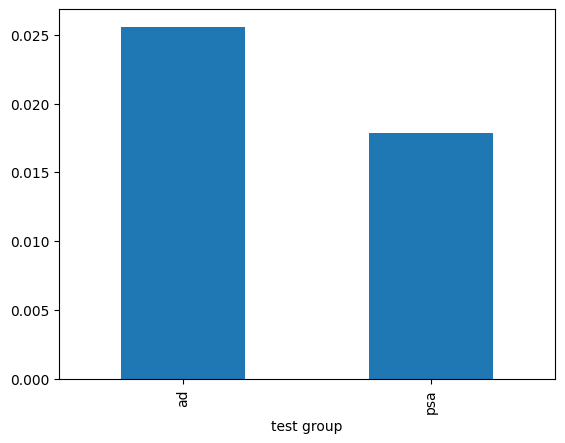

In [27]:
df.groupby("test group")["converted_dummy"].mean().plot(kind='bar')

<Axes: xlabel='most ads hour'>

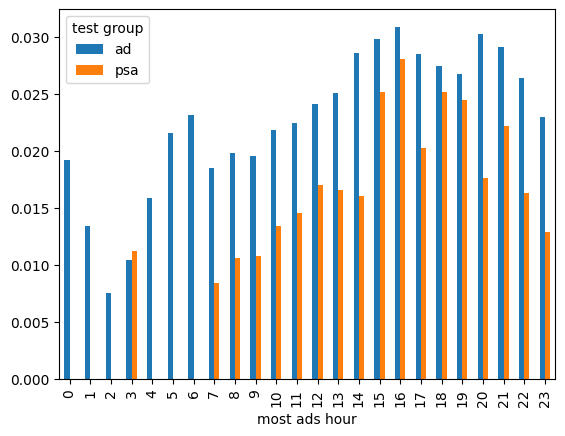

In [25]:
df.groupby(["most ads hour", "test group"])["converted_dummy"].mean().unstack().plot(kind='bar')

C:\Users\Eric Yoshida\AppData\Local\Temp\ipykernel_13020\2178019881.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ads count range', 'test group'])['converted_dummy'].mean().unstack().plot(kind='bar')


<Axes: xlabel='ads count range'>

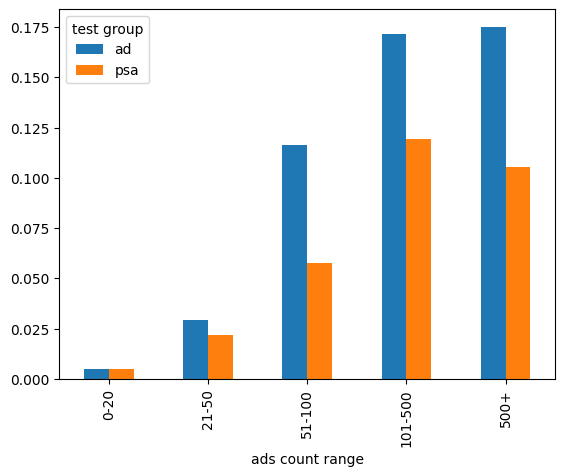

In [17]:
df['ads count range'] = pd.cut(df['total ads'], bins=[0, 20, 50, 100, 500, np.inf], labels=['0-20', '21-50', '51-100', '101-500', '500+'])
df.groupby(['ads count range', 'test group'])['converted_dummy'].mean().unstack().plot(kind='bar')


<Axes: ylabel='most ads day'>

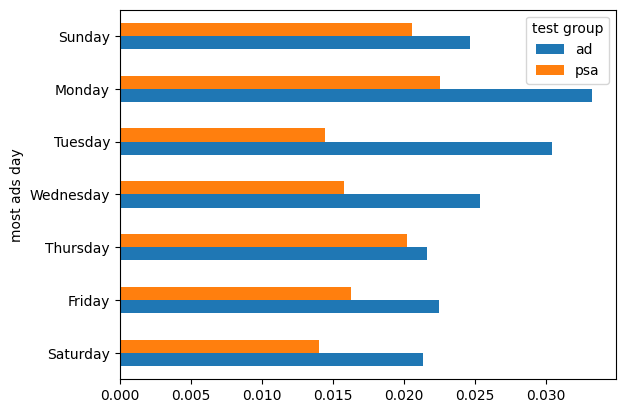

In [24]:
dias_semana = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df.groupby(['most ads day', 'test group'])['converted_dummy'].mean().unstack().loc[dias_semana[::-1]].plot(kind='barh')


## Resultados

O teste A/B demonstrou que há uma **diferença estatisticamente significativa** entre os grupos.  
Além disso, a análise revelou padrões importantes de comportamento: as **segundas e terças-feiras apresentam taxas de conversão mais altas**, e os horários entre **14h e 16h** e entre **20h e 21h** se destacam como períodos estratégicos, com maior probabilidade de conversão.